### Урок 3. Классификация. Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
#def calc_logloss(y, y_pred):
    #err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    #err = np.sum(err)
    #return err

In [51]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [8]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [9]:
z = np.linspace(-10, 10, 101)

In [10]:
probabilities = sigmoid(z)

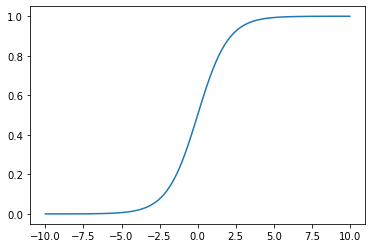

In [11]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [72]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [73]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)
W

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


array([ 0.36249064, -0.61234585,  0.63568321,  1.33183158])

## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.


Устанавливаем пороговые значения y_pred и с помощью numpy clip заменяем значения, чтобы нули были заменены установленными значениями

In [12]:
def calc_logloss(y, y_pred):
    y_pred_min = 1e-6
    y_pred_max = 1 - 1e-6
    y_pred = np.clip(y_pred, y_pred_min, y_pred_max)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [13]:
def eval_model(X, y, iterations, alpha=1e-4, tolerance = 1e-6):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    logloss = []
    weights = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T))
        weights.append(W)
        logloss.append(err)
        
        
        if i > 2:
            if np.abs(logloss[i-1] - logloss[i-2]) < tolerance:
                break
    
    return logloss, weights

In [14]:
def plot_err(logloss, weights):
    fig= plt.figure(figsize=(15,5))
    plt.suptitle(f'Optional rounds: {len(logloss)}, Errors: {logloss[-1]}', size = 15)
    
    plt.subplot(121)
    plt.plot(logloss, linewidth = 3)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('error', size = 15)
    
    plt.subplot(122)
    plt.plot(weights, linewidth = 3)
    plt.legend([f'$w_{i}$' for i in range(len(weights[0]))], loc = 'best',fontsize = 15)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('w', size = 15)
    plt.show()

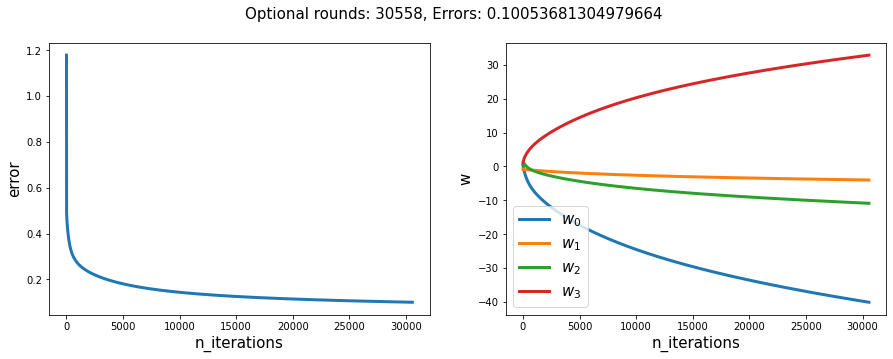

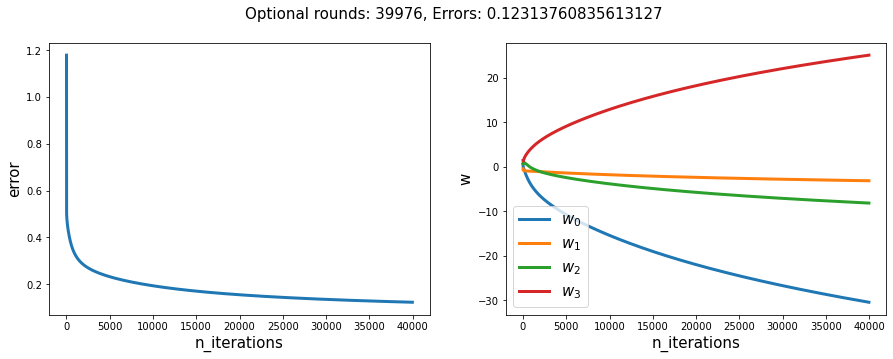

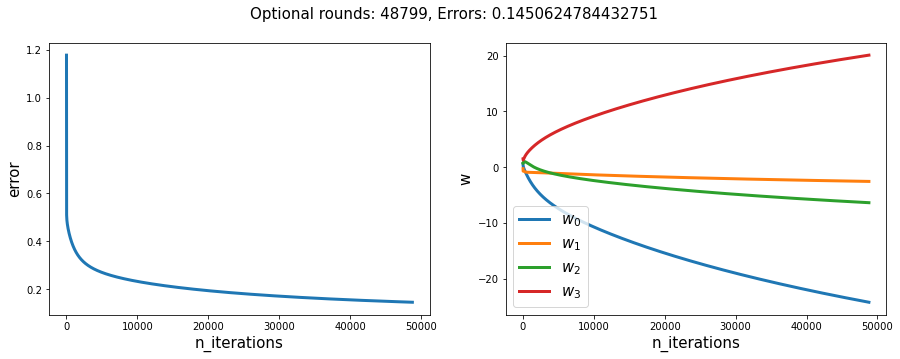

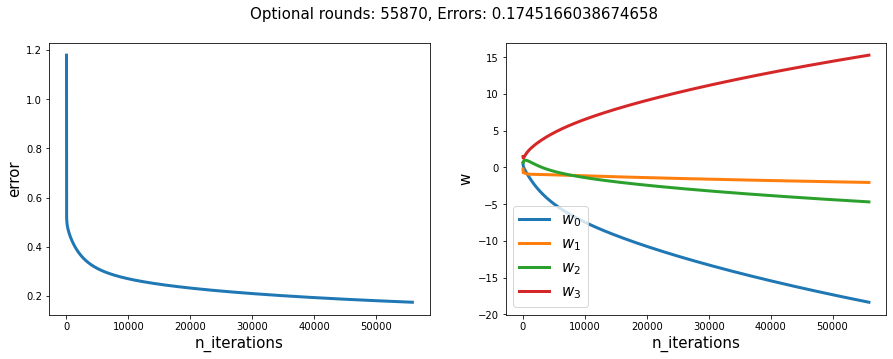

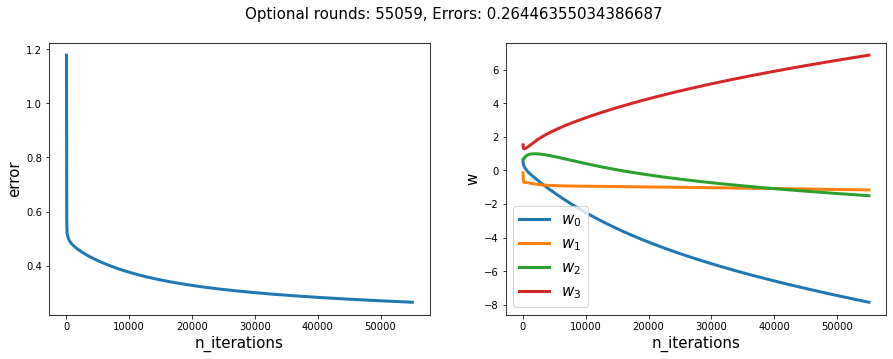

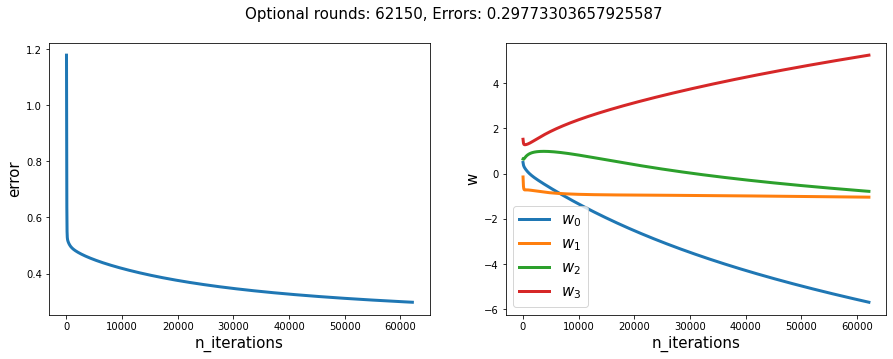

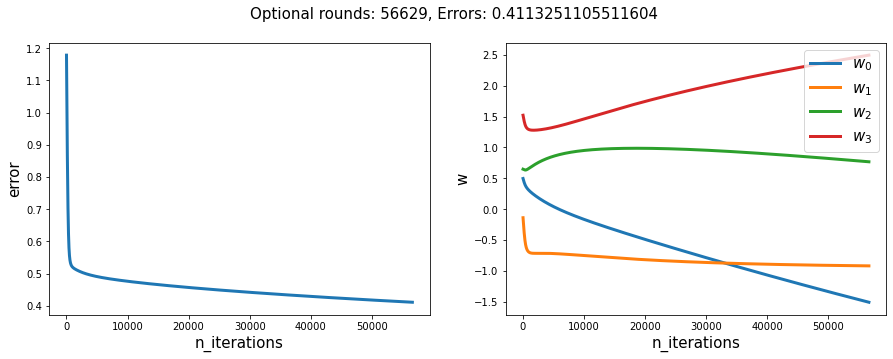

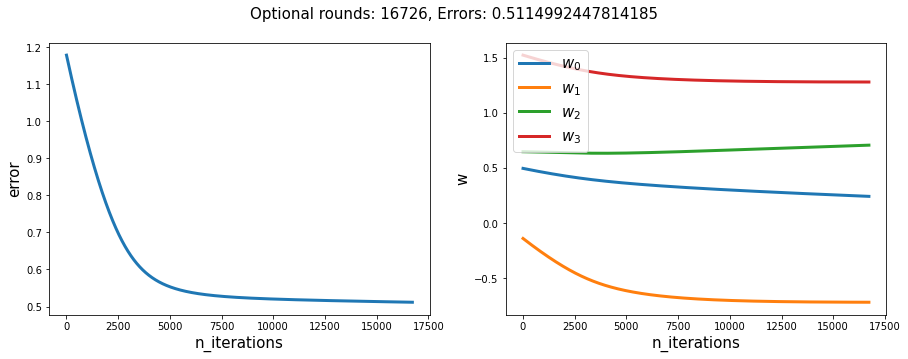

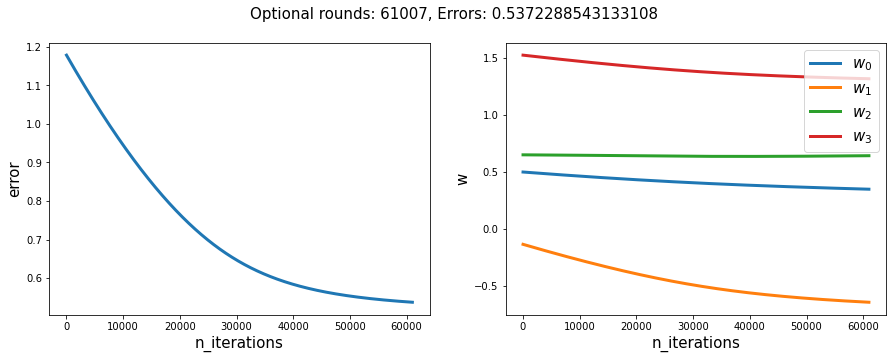

In [15]:
for alpha in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001]:
    W = eval_model(X_st, y, iterations=100000, alpha=alpha, tolerance = 1e-6)
    plot_err(W[0], W[1])

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.


In [16]:
def calc_pred_proba(W,X):
    z = np.dot(W,X)
    return 1/(1+np.exp(-z))

In [17]:
W = eval_model(X_st, y, iterations=100000, alpha=0.5, tolerance = 1e-6)

In [18]:
calc_pred_proba(W[1][-1], X_st)

array([3.63833160e-01, 6.40491275e-03, 1.00000000e+00, 7.03551372e-09,
       9.54761209e-01, 3.57665989e-02, 1.00000000e+00, 1.29362772e-02,
       6.37056069e-01, 9.99999964e-01])

4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.


In [19]:
def calc_pred(W,X,treshold = 0.5):
    y_pred = calc_pred_proba(W,X)
    y_pred = np.where(y_pred > treshold, 1, 0)
    return y_pred

In [20]:
y_pred = calc_pred(W[1][-1], X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [21]:
accuracy = np.sum(y_pred)/y_pred.shape[0]
accuracy

0.5

In [22]:
import pandas as pd
conf_matrix = np.array(pd.crosstab(y, y_pred)) # матрица ошибок
conf_matrix

array([[5, 0],
       [0, 5]])

In [23]:
precition = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[0,1]) # точность 
precition

1.0

In [24]:
recall = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[1,0]) # полнота
recall

1.0

In [25]:
F = 2 * precition * recall / (precition + recall)
F

1.0

6. Могла ли модель переобучиться? Почему?

Могла бы, если бы было мало исходных данных, была бы сильная корелляция данных, были бы выбросы данных и мы бы не делали регуляризацию